## target
task : img classification

data : MNIST

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
EPOCH = 10
BATCH_SIZE = 500
LR = 0.01
DOWNLOAD_MNIST = True # 請求下載

## train data

In [3]:
# download data
train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True, # is training data
    transform=torchvision.transforms.ToTensor(), # trans from numpy.ary to torch Tensor
    download = DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


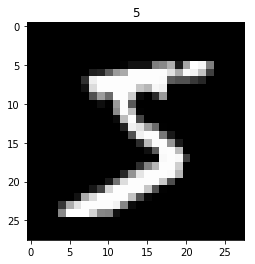

In [4]:
#plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())

plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [5]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# test data

In [6]:
test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
len(test_data)

10000

In [7]:
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)
test_x = test_x[:2000]/255.

test_y = test_data.test_labels[:2000]

## build CNN

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(# input size(1,28,28)
            nn.Conv2d( 
                in_channels = 1, # gray(if RGB, then in_channel=3)
                out_channels = 16, # num_filter
                kernel_size=5, # filter's height and width = 5
                stride=1, # shift 1 distance each time
                padding=2, # if stride=1, padding=(kernel_size-1)/2, filled with zero
            ),# -->(16, 28, 28)
            nn.ReLU(),# -->(16, 28, 28)
            nn.MaxPool2d(kernel_size=2,),# -->(16, 14, 14)
        )
        self.conv2 = nn.Sequential(# input size(16,14,14)
            nn.Conv2d(16, 32, 5, 1, 2), #(in, out, kernel, strid, padding) # -->(32, 14, 14)
            nn.ReLU(),# -->(32, 14, 14)
            nn.MaxPool2d(2), # -->(32, 7, 7)
        )
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) # (batch, 32, 7, 7)
        x = x.view(x.size(0), -1) #(batch, 32*7*7)
        output = self.out(x)
        return output

In [9]:
cnn=CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d (1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential(
    (0): Conv2d (16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear(in_features=1568, out_features=10)
)


##  training

In [10]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [11]:
FROBENIUS_NORM = 10. # gradient of loss t input
EARLYSTOPPING_N = 3

BREAK = False
earlystopping = 0
count = 0

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x, requires_grad=True) # batch x
        b_y = Variable(y) # batch y
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        test_output = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = sum(pred_y ==test_y)/ test_y.size(0)
                

        print('Epoch ', epoch, ' | step ', step, 
              ' | train loss %.4f'%loss.data[0], 
              ' | test accuracy: %.4f'%accuracy,
              ' | gradient of loss to input ', frobenius_norm,
                 )

    if BREAK: break

Epoch  0  | step  0  | train loss 2.3089  | test accuracy: 0.0970  | gradient of loss to input  Variable containing:
1.00000e-03 *
  4.7088
[torch.FloatTensor of size 1]

0.004708794876933098
Epoch  0  | step  1  | train loss 2.2827  | test accuracy: 0.5470  | gradient of loss to input  Variable containing:
1.00000e-03 *
  5.9736
[torch.FloatTensor of size 1]

0.005973645951598883
Epoch  0  | step  2  | train loss 2.1023  | test accuracy: 0.6415  | gradient of loss to input  Variable containing:
1.00000e-03 *
  6.0589
[torch.FloatTensor of size 1]

0.006058885715901852
Epoch  0  | step  3  | train loss 1.8179  | test accuracy: 0.5775  | gradient of loss to input  Variable containing:
1.00000e-03 *
  9.9376
[torch.FloatTensor of size 1]

0.009937603957951069
Epoch  0  | step  4  | train loss 1.4142  | test accuracy: 0.6355  | gradient of loss to input  Variable containing:
1.00000e-02 *
  1.5424
[torch.FloatTensor of size 1]

0.015424209646880627
Epoch  0  | step  5  | train loss 1.0225

Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bl515/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/Users/bl515/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.re

KeyboardInterrupt: 

In [ ]:
### train
# train_loss
loss.data[0]
# train_acc
train_x = Variable(torch.unsqueeze(train_data.train_data, dim=1), volatile=True).type(torch.FloatTensor)/255.
train_prediction = cnn.forward(train_x)
train_pred = torch.max(train_prediction, 1)[1].data.squeeze()
train_y = train_data.train_labels
train_acc = sum(train_pred ==train_y)/ train_y.size(0)

### test
test_pred = cnn.forward(test_x)

# test_loss
test_loss = loss_func(test_pred, Variable(test_y))
# test_acc
test_pred = torch.max(test_pred, 1)[1].data.squeeze()
test_acc = sum(test_pred ==test_y)/ test_y.size(0)

In [ ]:
print('Batch size : %s \n' % str(BATCH_SIZE))

# frobenius_norm
print('FROBENIUS_NORM %.4f' % FROBENIUS_NORM)

# training data
print('train_loss %.4f' % loss.data[0]) # training loss
print('train_acc %.4f' % train_acc)
print('test_loss %.4f' % test_loss.data[0])
print('test_acc %.4f' % test_acc)

In [ ]:
# Batch size : 6000 

# train_loss 0.0562
# train_acc 0.9836
# test_loss 0.0619
# test_acc 0.9790

In [ ]:
# Batch size : 50 

# train_loss 0.0539
# train_acc 0.9602
# test_loss 0.1804
# test_acc 0.9460


In [23]:
cnn.conv1.parameters() = cnn.conv1.parameters() + cnn.conv1.parameters()

SyntaxError: can't assign to function call (<ipython-input-23-4debca68d9f9>, line 1)